In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random as rd
from scipy.spatial.distance import cdist 
import sys
%matplotlib inline

# 1) K-MEANS

## a) Program from scratch the clustering algorithm k-means with random initialization.

In [2]:
class k_means:

    def __init__(self, N_c):
        
        self.N_centroids = N_c
        
    def initialization_of_centroids_random(self):    
        sel = np.random.choice(self.N_points, size=self.N_centroids, replace=False)
        return self.data[ sel ]
    
    def initialization_of_centroids_plusplus(self):    
        i=rd.randint(0,self.N_points-1)
        centroids=np.array([self.data[i]])
        for k in range(1, self.N_centroids):
            D=np.array([]) 
            D=np.append(D,np.min(cdist(self.data, centroids,'sqeuclidean'), axis=1))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            centroids=np.append(centroids,[self.data[i]],axis=0)
        return centroids
         
    
    def fit(self, data, init="random", N_max_iterations=1000):
        
        self.data=data
        self.N_points = np.shape(self.data)[0]
        
        if init=="k-means++":
            self.centroid_positions =  self.initialization_of_centroids_plusplus()
        else:    
            self.centroid_positions =  self.initialization_of_centroids_random()
            
        for cnt in range(N_max_iterations):
            dist2_mat = cdist(self.data, self.centroid_positions,'sqeuclidean')   
            dist2_min = np.array([np.min(dist2_mat, axis = 1) ]) 
            self.labels = np.argmin(dist2_mat, axis = 1)
            error = dist2_min.sum() 
            new_centers = np.array([self.data[self.labels  == i].mean(axis=0)
                                for i in range(self.N_centroids) if len(self.data[self.labels  == i]) > 0 ])
            
            if np.shape(self.centroid_positions)!=np.shape(new_centers):
                new_centers = self.initialization_of_centroids_random()
            if np.all(self.centroid_positions == new_centers):
                return error, cnt 
            self.centroid_positions = new_centers
            
        print("Max iterations reached")
        return error,cnt 

       
    def plot(self):    
        
        colors = plt.cm.get_cmap('rainbow')(np.linspace(0, 1, self.N_centroids))
        title_ = "label graph" 
        fig = plt.figure()
        label_set = set(self.labels)
        label_count = len(label_set)
        for cen in range(self.N_centroids):
            arr_points=self.data[self.labels  == cen]
            plt.scatter(arr_points[:,0],arr_points[:,1], color=colors[cen],s=4)
        plt.scatter(self.centroid_positions[:,0],self.centroid_positions[:,1], color="k")   
        title_text = 'instance count: %d, label count: %d' % (self.N_points, label_count)
        plt.title(title_text)
        plt.xlabel('x')
        plt.ylabel('y')
        
    def get_assignation(self):
        out = np.empty((self.N_points,3))
        for idx in range(self.N_points):
            out[idx,0]=self.data[idx][0]
            out[idx,1]=self.data[idx][1]
            out[idx,2]=self.labels[idx]
        return out      
    
    
    def F_ratio_index(self):
        SSW=0
        SSB = 0
        n_points_per_centroid=np.empty(self.N_centroids)
        xbar=self.data.mean(axis=0)
        for cen in range(self.N_centroids):
            centroid_points=self.data[self.labels  == cen]
            n_points_per_centroid[cen] = np.shape(centroid_points)[0]
            c = self.centroid_positions[cen].reshape((1,2))
            SSW += cdist(centroid_points, c, 'sqeuclidean').sum()
        
        for cen in range(self.N_centroids):
            a = self.centroid_positions[cen].reshape((1,2))
            b = xbar.reshape((1,2))
            SSB += n_points_per_centroid[cen] * cdist(a, b  ,'sqeuclidean').sum()
        return self.N_centroids * SSW/SSB    
     

## b) Download the data set S3 from http://cs.uef.fi/sipu/datasets/

19057620819251.793 30
CPU times: user 127 ms, sys: 6.3 ms, total: 134 ms
Wall time: 133 ms


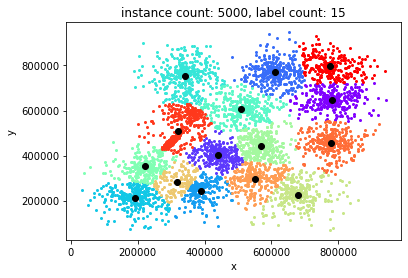

In [3]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
myk = k_means(15)
error,iteration=myk.fit(data_points) 
myk.plot()
print(error,iteration)

## c) Apply the algorithm with k=15 100 times, obtain the best value of the objective function and the average one. Plot the assignation for the best case.

0 16889732003209.457 16
1 19203702028475.18 18
2 18883907476918.812 29
3 21181721724605.46 24
4 19232196424428.0 49
5 18962060572434.305 21
6 21455785994644.953 26
7 20901063254530.516 51
8 18712460946359.96 12
9 21202671011296.86 41
10 18693969064933.742 14
11 21471171213008.484 34
12 19120348645677.664 24
13 21242953986613.098 34
14 16890251267437.508 37
15 20671633714015.977 31
16 20900491976618.4 19
17 21068620870721.875 22
18 21566495120571.383 19
19 18737623402526.035 26
20 18959447121727.74 23
21 19238255713399.125 14
22 21185707034726.17 20
23 19252331718287.016 18
24 21007566424601.836 17
25 18711047203324.875 33
26 19237129505304.266 32
27 16890624142725.135 21
28 18978055051420.555 19
29 19206886052469.92 13
30 23567734598203.645 26
31 18883369128794.75 32
32 18801021112132.035 16
33 19214575196706.906 38
34 18827769452532.242 27
35 18966764373163.69 26
36 19200655610426.82 31
37 18827731955727.67 31
38 21392746311166.586 68
39 16889798176980.414 12
40 22690756899433.0 31
41

330 21043438347048.805 29
331 18899701061907.254 32
332 18900062546948.77 18
333 18954567735763.02 17
334 21305623177058.703 18
335 18727622346699.625 31
336 16890294938260.39 19
337 20739725704236.39 20
338 18693540126378.367 53
339 18947409901859.656 21
340 19356768406354.36 18
341 22861546191848.656 29
342 18882798837211.508 38
343 19251078503137.57 18
344 20663327535477.457 41
345 18773734003766.96 20
346 19214506783211.96 18
347 20659949808733.82 28
348 19095384852285.016 49
349 18800048422745.676 41
350 20851474507631.62 34
351 18926771875312.914 43
352 18754937345922.477 25
353 16890511932312.121 43
354 20948611759256.887 41
355 18805751360010.523 20
356 18795256648371.16 51
357 16890561177087.4 20
358 18900389284514.492 15
359 21090739346710.258 18
360 20671621450587.67 21
361 21322007895323.016 21
362 19233025103210.344 16
363 21195132212801.36 16
364 21145958067738.07 25
365 18785935955248.28 34
366 18877846732700.883 18
367 20627241819423.707 31
368 16889963204861.305 25
369

652 18898991351476.742 34
653 18877626579967.715 15
654 18803951390165.277 48
655 19199893637292.707 41
656 18810627693075.246 23
657 18668762325043.863 26
658 18670973636897.18 36
659 19122635175399.89 18
660 21201206070283.86 35
661 18979608403078.86 17
662 24737571118302.04 30
663 18737638495785.14 18
664 21396986576377.473 41
665 18819364668886.68 16
666 20662815672287.582 31
667 19223759522175.13 67
668 19040610678415.484 13
669 19212033892290.344 26
670 18958132751561.9 16
671 18923150219758.547 34
672 19169491214407.383 23
673 21241215563325.78 20
674 20637519902531.555 20
675 21001701542244.418 29
676 20708228279818.93 19
677 19356337374361.79 20
678 21164111914051.5 49
679 21261170026261.406 22
680 18848054033641.914 44
681 18625956584305.344 18
682 19083560490993.08 30
683 21234912105841.89 35
684 18865962231016.24 23
685 18992304931832.71 14
686 20951904078289.305 21
687 21208429639507.336 27
688 16890487112543.734 43
689 18693883746398.047 60
690 19209442945256.992 23
691 1

977 18800586103017.33 45
978 19216820013360.656 21
979 19097688511187.72 24
980 16890268772306.527 13
981 16889815681849.434 18
982 18670397185605.22 16
983 18663006571534.69 15
984 18668868437097.355 31
985 18848100347068.234 25
986 21142674948023.004 15
987 18710731342204.758 51
988 19225768045467.57 21
989 19356726661509.82 14
990 21009373335655.008 17
991 20994987022701.21 22
992 21109429191536.6 21
993 23388359875282.15 26
994 18803940110904.062 47
995 19030174769479.574 37
996 21471171213008.484 28
997 22780278989426.33 19
998 19200075222740.918 18
999 16890234418747.105 20
mean =  19568438186211.777
i_min =  79
min =  16889571849356.738
avg convengece =  27.103


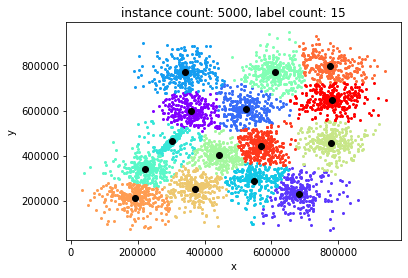

CPU times: user 55.5 s, sys: 873 ms, total: 56.4 s
Wall time: 56.7 s


In [4]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=1000
tmp_myk = k_means(15)
min_error= sys.maxsize
errors = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    error,iteration=tmp_myk.fit(data=data_points, init="random") 
    if error<min_error:
        min_error=error
        i_min=i
        min_myk = tmp_myk
    print(i,error,iteration)    
    errors[i]=error
    iterations[i]=iteration
    
min_myk.plot()
print("mean = ",errors.mean())
print("i_min = ",i_min)
print("min = ",errors[i_min])    
print("avg convengece = ",iterations.mean())
plt.show()

Note:
    $$ \text{mean} \simeq 1.95 \times 10^{13} $$
    $$ \text{avg convengece in} \simeq  27  \text{ iterations}$$

## d) Implement K-means ++ initialization in your algorithm and redo point c)

0 21505710136442.234 19
1 20691219870668.023 26
2 19015479655969.535 15
3 19214499006806.5 44
4 16890176148859.23 23
5 16890385632775.113 26
6 18890566225528.555 18
7 18935423332055.562 24
8 20651396188455.348 14
9 16890385632775.113 17
10 16889602517268.717 19
11 20723829149792.45 15
12 20645865080733.906 12
13 21197329410121.188 37
14 18864218587446.22 23
15 19006936932922.008 16
16 18623138568994.72 11
17 20854832235729.438 22
18 21010607802683.45 22
19 21246285329632.344 19
20 18900144345924.773 16
21 18800586103017.33 49
22 16890296545494.846 10
23 18900036983365.684 13
24 18707505816709.773 23
25 18819529866523.184 25
26 18895682943371.695 19
27 16890719389574.705 33
28 20644108658788.688 18
29 18778363830415.54 21
30 19119777002592.0 15
31 18669855031844.89 21
32 18625921965091.387 14
33 18711047203324.875 33
34 16890385632775.113 16
35 18863460545748.08 18
36 19199533557370.453 36
37 18693931045764.562 13
38 18898866309167.367 15
39 19216889170776.625 25
40 18836121224792.445 1

326 21064461488302.305 17
327 20694915604682.758 37
328 16890400420594.033 24
329 19406164328515.03 27
330 19209422039287.61 22
331 20647947716996.043 42
332 18908461765376.625 38
333 16889852470215.83 17
334 20643585271855.574 38
335 18908657154160.39 28
336 18908641529034.848 20
337 18727476997641.734 29
338 16890469607674.719 20
339 16890528227695.516 14
340 18865997800298.047 28
341 18710547661969.36 13
342 16890201059846.6 21
343 20892042839702.54 28
344 18832436719330.703 28
345 19042917785379.9 22
346 19120056238889.457 18
347 18827097047833.508 12
348 18826523981246.156 16
349 19211499669328.29 39
350 18957764018774.08 53
351 18863739778433.344 17
352 19236946833807.25 57
353 20654649075308.723 12
354 18581455661440.77 17
355 18822970485579.28 15
356 16889922402430.291 31
357 19029379956188.035 15
358 18823165124893.438 16
359 18937893182181.9 16
360 19184245594084.176 15
361 19200806993567.58 18
362 18884107491912.35 37
363 16890647869037.102 44
364 18939811821414.48 41
365 16

649 18955977219522.562 22
650 18893697381697.39 20
651 18599508122558.33 30
652 18921563550942.773 35
653 19016650554061.508 16
654 20747442175648.746 15
655 16889910876497.32 19
656 16890015480959.084 11
657 18771265627162.258 14
658 16890394108141.45 24
659 18827731955727.67 44
660 19221031418646.992 48
661 20940178619100.875 29
662 21011366933781.492 29
663 16889833718920.566 19
664 16890297655310.484 19
665 16890340829305.252 12
666 16889875728914.988 12
667 18754776669806.895 40
668 18890746249027.37 30
669 18921581055811.793 38
670 19238401541718.547 14
671 18844018678304.96 22
672 18847716391327.08 10
673 18682776681281.465 21
674 18804302766025.555 22
675 19029209790259.586 23
676 20824919133636.594 27
677 18743494070087.875 56
678 18979621278176.484 22
679 18743562521410.54 17
680 16889635220389.695 12
681 18743275795105.312 44
682 18616261766858.133 24
683 16890502756924.723 15
684 18887942433488.6 25
685 21082774298115.914 18
686 16890297655310.484 31
687 20766082822925.08 1

971 18600632533618.965 22
972 16890647869037.102 41
973 18832724735413.047 28
974 18745876644929.203 18
975 18654074704066.676 13
976 21210128598086.977 39
977 16890530990527.035 15
978 18992163220211.867 16
979 18827148647705.566 14
980 19200127319700.324 9
981 18896369429913.04 14
982 16889814473445.15 14
983 18693540126378.367 32
984 18743391683398.434 33
985 18654670612291.562 12
986 18743391683398.434 23
987 20818146379790.18 21
988 19406889515534.08 34
989 20618929948912.11 30
990 20628470594674.652 17
991 16890719389574.705 29
992 16890463386231.768 16
993 18784665774870.965 26
994 18885411755722.094 12
995 18833047211856.473 31
996 16889823872745.697 16
997 21004835140548.934 46
998 19021566608360.523 19
999 18822946010777.0 16
mean =  18976485719494.23
i_min =  208
min =  16889571849356.738
avg convengece =  22.709


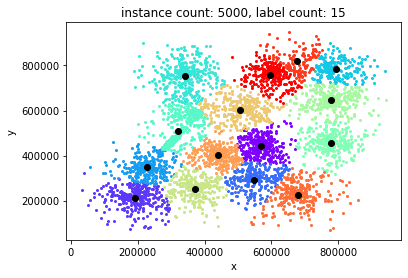

CPU times: user 1min 10s, sys: 1.84 s, total: 1min 12s
Wall time: 1min 19s


In [5]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=1000
tmp_myk = k_means(15)
min_error= sys.maxsize
errors = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    error,iteration=tmp_myk.fit(data=data_points, init="k-means++") 
    if error<min_error:
        min_error=error
        i_min=i
        min_myk = tmp_myk
    print(i,error,iteration)        
    errors[i]=error
    iterations[i]=iteration
    
min_myk.plot()
print("mean = ",errors.mean())
print("i_min = ",i_min)
print("min = ",errors[i_min])    
print("avg convengece = ",iterations.mean())
plt.show()

Note:
    $$ \text{mean} \simeq 1.89 \times 10^{13} $$
    $$ \text{avg convengece in} \simeq  23  \text{ iterations}$$

## e) Perform the scree plot (with k from 2 to 20) for this data set using the best value of the objective function.

2 210428334804957.56
3 139614749639647.7
4 91771622303874.1
5 75054113455106.05
6 61401881375290.59
7 50219935269293.875
8 42058483134754.016
9 36048589584476.06
10 30332860333232.836
11 27297389783622.51
12 24424335830351.633
13 21767253017798.883
14 19210855194120.21
15 16889672830898.951
16 16196954197510.771
17 15572049556072.68
18 15089313851528.379
19 14579023424937.188
20 14002935574718.19
CPU times: user 1min 29s, sys: 828 ms, total: 1min 30s
Wall time: 1min 33s


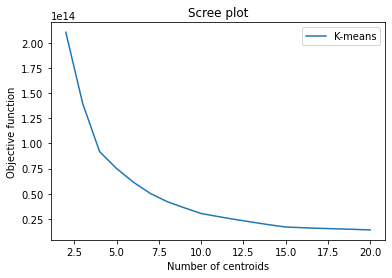

In [7]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=100

res_k=list()

for n_c in range(2,21):
    tmp_myk = k_means(n_c)
    min_error= sys.maxsize
    errors = np.empty(N_simulations)
    i_tmp = 0
    iterations = np.empty(N_simulations)
    for i in range(N_simulations):
        error,iteration=tmp_myk.fit(data=data_points) 
        if error<min_error:
            min_error=error
            i_min=i
            min_myk = tmp_myk  
        errors[i]=error
        iterations[i]=iteration
    print(n_c,errors[i_min])    
    res_k.append([n_c,errors[i_min]])

res_k=np.array(res_k)
plt.plot(res_k[:,0], res_k[:,1], label="K-means")
plt.title("Scree plot")
plt.ylabel('Objective function')
plt.xlabel('Number of centroids')
plt.legend()

# 2. FUZZY C-MEANS

## a) Modify k-means for obtaining c-means.

We use this relation:

$$ u_{ij}=\frac{1}{\sum_{k=1}^C\left( \frac{|| x_i-c_j||}{||x_i-c_k||}\right)^{\frac{2}{m-1}} }$$

$$ u_{ij}=\frac{1}{\sum_{k=1}^C\left( \frac{\sqrt{ (x_i-c_j)^2 }}{\sqrt{(x_i-c_k)^2}}\right)^{\frac{2}{m-1}} }$$

$$ u_{ij}=\frac{1}{\sum_{k=1}^C\left( \frac{ (x_i-c_j)^2 }{(x_i-c_k)^2}\right)^{\frac{1}{m-1}} }$$


$$ u_{ij}= \frac{   \sum_{k=1}^C \left((x_i-c_k)^2\right)^{\frac{1}{m-1}}   }{ \left((x_i-c_j)^2 \right)^{\frac{1}{m-1}}} $$


$$ u_{ij}= \frac{   \sum_{k=1}^C \left(d^2_{ik}\right)^{\frac{1}{m-1}}   }{ \left(d^2_{ij} \right)^{\frac{1}{m-1}}} $$

$$ u_{ij}= \frac{  \tilde{u}_{ij}  }{  \sum_{k=1}^C \tilde{u}_{ik}  } $$

In [8]:
class fuzzy_c_means:

    def __init__(self, N_c, m=2):
        self.N_centroids = N_c
        self.m = m
        self.centroid_positions =np.empty((self.N_centroids,2))

    def fit(self,data, N_max_iterations=500, tol=1e-3):
        self.data = data
        self.N_points = np.shape(self.data)[0]
        self.u = np.empty((self.N_centroids,self.N_points))
        # Randomly initialize centers
        self.centroid_positions = self.data[np.random.choice(self.N_points, size=self.N_centroids, replace=False)]
    
        dist = np.fmax(
            cdist(self.centroid_positions, self.data, metric='sqeuclidean'), np.finfo(np.float64).eps)
        prev_u = np.ones((self.N_centroids,self.N_points))
        for iteration in range(N_max_iterations):     
            utilde = (1 / dist) ** (1 / (self.m-1))
            self.u  = (utilde / utilde.sum(axis=0))
            um=self.u **self.m
            denominator = np.reshape(um.sum(axis=1),(self.N_centroids,1))
            self.centroid_positions = um.dot(self.data)/denominator
            dist = cdist(self.centroid_positions, self.data, metric='sqeuclidean')
            dist2_min = np.array([np.min(dist,axis=0) ]) 
            self.labels = np.argmin(dist,axis=0)
            error=dist2_min.sum() 
            if np.linalg.norm(prev_u-self.u )<tol: 
                break

            # Compute cost
            cost = np.sum(um * dist)
            prev_u=self.u 
            
        return error, iteration, cost
    
    def plot(self):    
        
        colors = plt.cm.get_cmap('rainbow')(np.linspace(0, 1, self.N_centroids))
        title_ = "label graph" 
        fig = plt.figure()
        label_set = set(self.labels)
        label_count = len(label_set)
        for cen in range(self.N_centroids):
            arr_points=self.data[self.labels  == cen]
            plt.scatter(arr_points[:,0],arr_points[:,1], color=colors[cen],s=4)
        plt.scatter(self.centroid_positions[:,0],self.centroid_positions[:,1], color="k")   
        title_text = 'instance count: %d, label count: %d' % (self.N_points, label_count)
        plt.title(title_text)
        plt.xlabel('x')
        plt.ylabel('y')



## b) Perform the scree plot for the same data set.

2 213560845494917.38
3 146155098121176.88
4 93722542845525.75
5 78198873872709.92
6 63888894749064.914
7 52167560101212.44
8 44796773297401.31
9 37849996229527.78
10 31328233749676.47
11 28053786983747.785
12 24964204573441.67
13 22374439981772.297
14 19591198654637.37
15 16941896117555.953
16 16316227243502.84
17 15797172582079.898
18 15315142007232.398
19 14875553338791.13
20 14463344710991.85
CPU times: user 10min 2s, sys: 11.1 s, total: 10min 13s
Wall time: 5min 12s


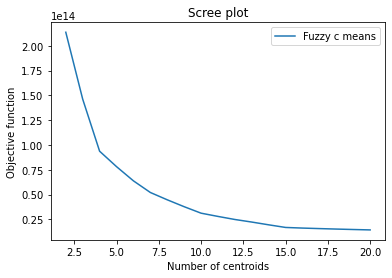

In [9]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=100

res_fuzzy=list()

for n_c in range(2,21):
    tmp_myfuz = fuzzy_c_means(n_c)
    min_error= sys.maxsize
    errors = np.empty(N_simulations)
    i_tmp = 0
    iterations = np.empty(N_simulations)
    for i in range(N_simulations):
        error,iteration,_=tmp_myfuz.fit(data=data_points) 
        if error<min_error:
            min_error=error
            i_min=i
            min_myfuz = tmp_myfuz  
        errors[i]=error
        iterations[i]=iteration
    print(n_c,errors[i_min])    
    res_fuzzy.append([n_c,errors[i_min]])

res_fuzzy=np.array(res_fuzzy)
plt.plot(res_fuzzy[:,0], res_fuzzy[:,1], label="Fuzzy c means")
plt.title("Scree plot")
plt.ylabel('Objective function')
plt.xlabel('Number of centroids')
plt.legend()

## Scree plot comparison 

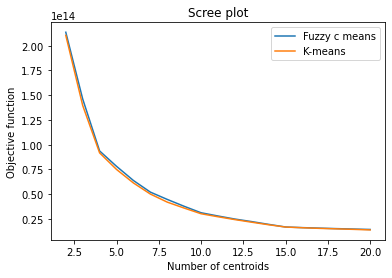

In [10]:
plt.plot(res_fuzzy[:,0], res_fuzzy[:,1], label="Fuzzy c means")
plt.plot(res_k[:,0], res_k[:,1], label="K-means")

plt.title("Scree plot")
plt.ylabel('Objective function')
plt.xlabel('Number of centroids')
#plt.yscale("log")
plt.legend()

## c) Plot the assignation for the best case.

0 19152646086153.125 118 8501740575746.744
1 16941899249858.424 48 7988108830447.999
2 19542009787222.54 88 8522457154215.2
3 19785668073874.668 171 8987626761298.13
4 19594624321390.094 146 8879791331861.926
5 16941903981142.47 215 7988108831198.034
6 20690569912415.25 147 8655186761810.405
7 16941904784888.271 24 7988108827111.3
8 19662531380732.566 81 8555911766496.19
9 16941907794775.787 70 7988108826965.953
10 16941900346082.344 66 7988108833153.8125
11 19698767558754.633 50 8572169651375.604
12 19449926492595.586 80 8514739069159.321
13 19449928441762.918 68 8514739068709.389
14 19792726593560.438 66 8472431859851.734
15 19595032410418.984 61 8879791329363.21
16 16941902589597.422 49 7988108826305.684
17 19352402811212.324 55 8645967915152.196
18 16941907776134.59 40 7988108829002.13
19 21257854834649.14 82 8707417822441.106
20 19094183637769.04 60 8447465328115.786
21 19324021045891.6 83 8642592008658.775
22 16941905891558.062 31 7988108828214.672
23 19449949989099.562 42 851473

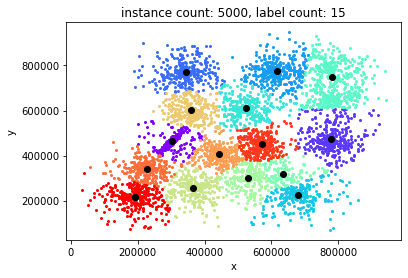

CPU times: user 32.9 s, sys: 797 ms, total: 33.7 s
Wall time: 18.1 s


In [11]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=100
tmp_myfuz = fuzzy_c_means(15)
min_error=sys.maxsize
errors = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    error,iteration,cost=tmp_myfuz.fit(data_points) 
    if error<min_error:
        min_error=error
        i_min=i
        min_myfuz = tmp_myfuz
    print(i,error,iteration,cost)
    errors[i]=error
    iterations[i]=iteration
    
min_myfuz.plot()
print("mean = ",errors.mean())
print("i_min = ",i_min)
print("min = ",errors[i_min])    
print("avg convengece = ",iterations.mean())
plt.show()